In [1]:
import sys
import pydytuesday
import pandas as pd

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# See version specifications of packages used (for reproducibility)
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
matplotlib: 3.6.2
seaborn: 0.13.2


In [3]:
# Load data from the official tidytuesday repo
# Use date to fetch the files for that week
pydytuesday.get_date('2025-07-15')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-15/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-15/readme.md
Successfully saved bl-funding-adjusted-breakdown-1998-2023.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_15072025\bl-funding-adjusted-breakdown-1998-2023.png
Successfully saved bl_funding.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_15072025\bl_funding.csv
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_15072025\meta.yaml


In [4]:
# Load dataset using Pandas 
blf = pd.read_csv('bl_funding.csv')

In [5]:
print(blf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           26 non-null     int64  
 1   nominal_gbp_millions           26 non-null     float64
 2   gia_gbp_millions               26 non-null     float64
 3   voluntary_gbp_millions         26 non-null     float64
 4   investment_gbp_millions        26 non-null     float64
 5   services_gbp_millions          26 non-null     float64
 6   other_gbp_millions             26 non-null     float64
 7   year_2000_gbp_millions         18 non-null     float64
 8   inflation_adjustment           26 non-null     float64
 9   total_y2000_gbp_millions       26 non-null     float64
 10  percentage_of_y2000_income     26 non-null     float64
 11  gia_y2000_gbp_millions         26 non-null     float64
 12  voluntary_y2000_gbp_millions   26 non-null     float

In [6]:
# Set display width so that the details appear in a single line
pd.set_option('display.width', 1000)

# See sample records and statistical
print("\n", blf.describe())
print("\n Sample Records: \n", blf.head())


               year  nominal_gbp_millions  gia_gbp_millions  voluntary_gbp_millions  investment_gbp_millions  services_gbp_millions  other_gbp_millions  year_2000_gbp_millions  inflation_adjustment  total_y2000_gbp_millions  percentage_of_y2000_income  gia_y2000_gbp_millions  voluntary_y2000_gbp_millions  investment_y2000_gbp_millions  services_y2000_gbp_millions  other_y2000_gbp_millions  gia_as_percent_of_peak_gia
count    26.000000             26.000000         26.000000                26.00000                26.000000              26.000000           26.000000               18.000000          2.600000e+01                 26.000000                   26.000000               26.000000                     26.000000                      26.000000                    26.000000                 26.000000                   26.000000
mean   2010.500000            129.171500         98.078308                 9.84950                 0.870885              19.447923            0.912885          

In [7]:
df = blf.drop(columns=['year_2000_gbp_millions'])


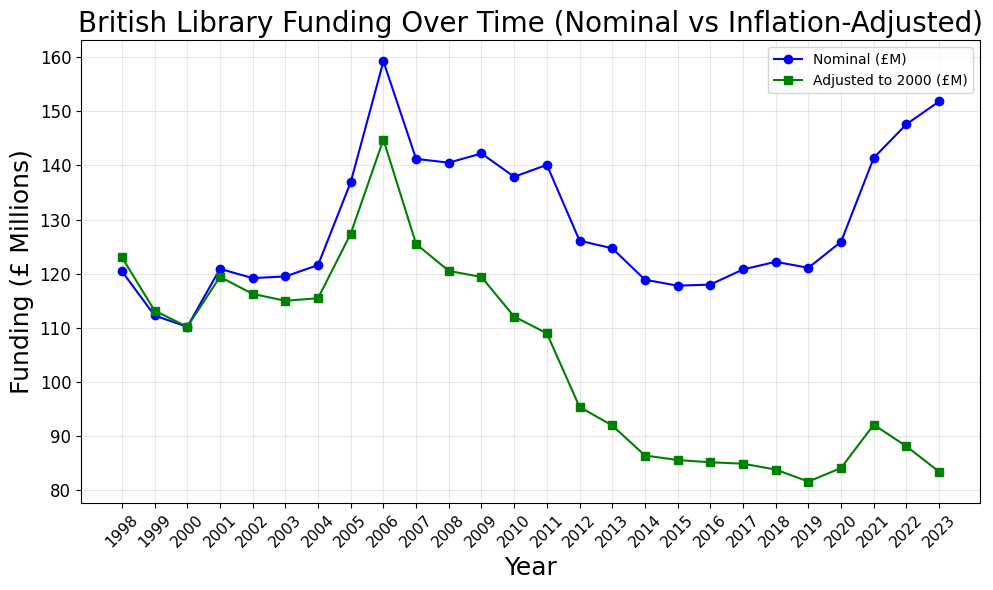

In [93]:
plt.figure(figsize=(10,6))
plt.plot(df['year'], df['nominal_gbp_millions'], marker='o', color='blue', label='Nominal (£M)')
plt.plot(df['year'], df['total_y2000_gbp_millions'], marker='s', color='green', label='Adjusted to 2000 (£M)')
plt.title('British Library Funding Over Time (Nominal vs Inflation-Adjusted)', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Funding (£ Millions)', size=18)
years = sorted(df['year'])
plt.xticks(ticks=years, size=11, rotation=45)
plt.yticks(size=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

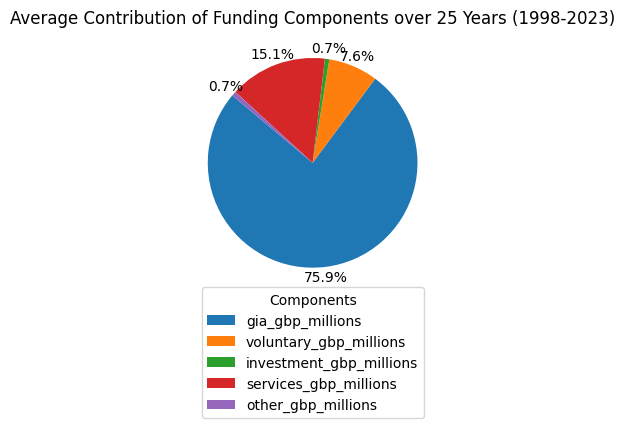

In [97]:
components = ['gia_gbp_millions', 'voluntary_gbp_millions', 'investment_gbp_millions', 'services_gbp_millions', 'other_gbp_millions']
avg_contributions = df[components].mean()

plt.figure(figsize=(6,5))
wedges, texts, autotexts = plt.pie(
    avg_contributions, 
    labels=None,          # no slice labels
    autopct='%1.1f%%',    # show % on slices
    startangle=140,
    pctdistance=1.1       # move pct labels outside slices
)

plt.title('Average Contribution of Funding Components over 25 Years (1998-2023)')

# Adjust autotexts (percentage text) to be outside and readable
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_bbox(dict(facecolor='gray', edgecolor='none', alpha=0.0, boxstyle='round,pad=0.3'))

# Add legend outside the pie
plt.legend(wedges, components, title="Components", loc="lower center", bbox_to_anchor=(0.5, -0.5, 0, 0))

plt.tight_layout()
plt.show()

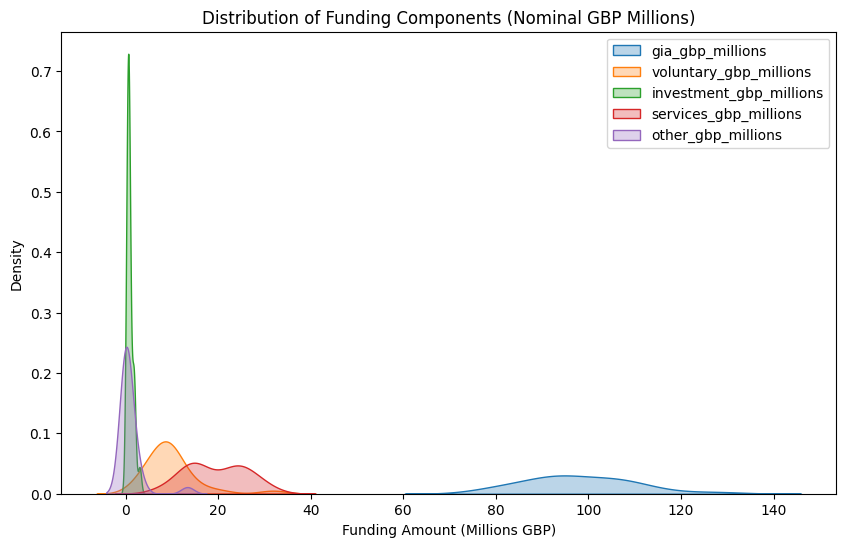

In [69]:
plt.figure(figsize=(10,6))

for comp in components:
    sns.kdeplot(df[comp], label=comp, fill=True, alpha=0.3)

plt.title('Distribution of Funding Components (Nominal GBP Millions)')
plt.xlabel('Funding Amount (Millions GBP)')
plt.ylabel('Density')
plt.legend()
plt.show()

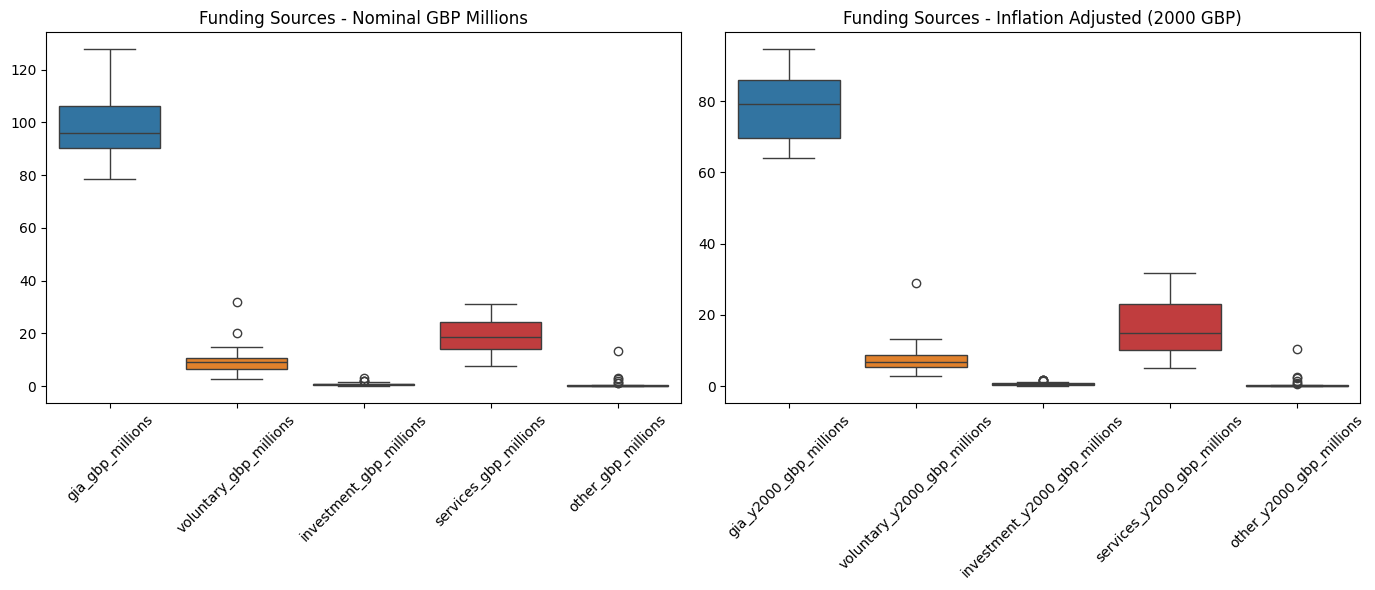

In [9]:
sources_nominal = ['gia_gbp_millions', 'voluntary_gbp_millions', 'investment_gbp_millions', 
                   'services_gbp_millions', 'other_gbp_millions']
sources_real = ['gia_y2000_gbp_millions', 'voluntary_y2000_gbp_millions', 
                'investment_y2000_gbp_millions', 'services_y2000_gbp_millions', 
                'other_y2000_gbp_millions']

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=df[sources_nominal])
plt.title('Funding Sources - Nominal GBP Millions')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=df[sources_real])
plt.title('Funding Sources - Inflation Adjusted (2000 GBP)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



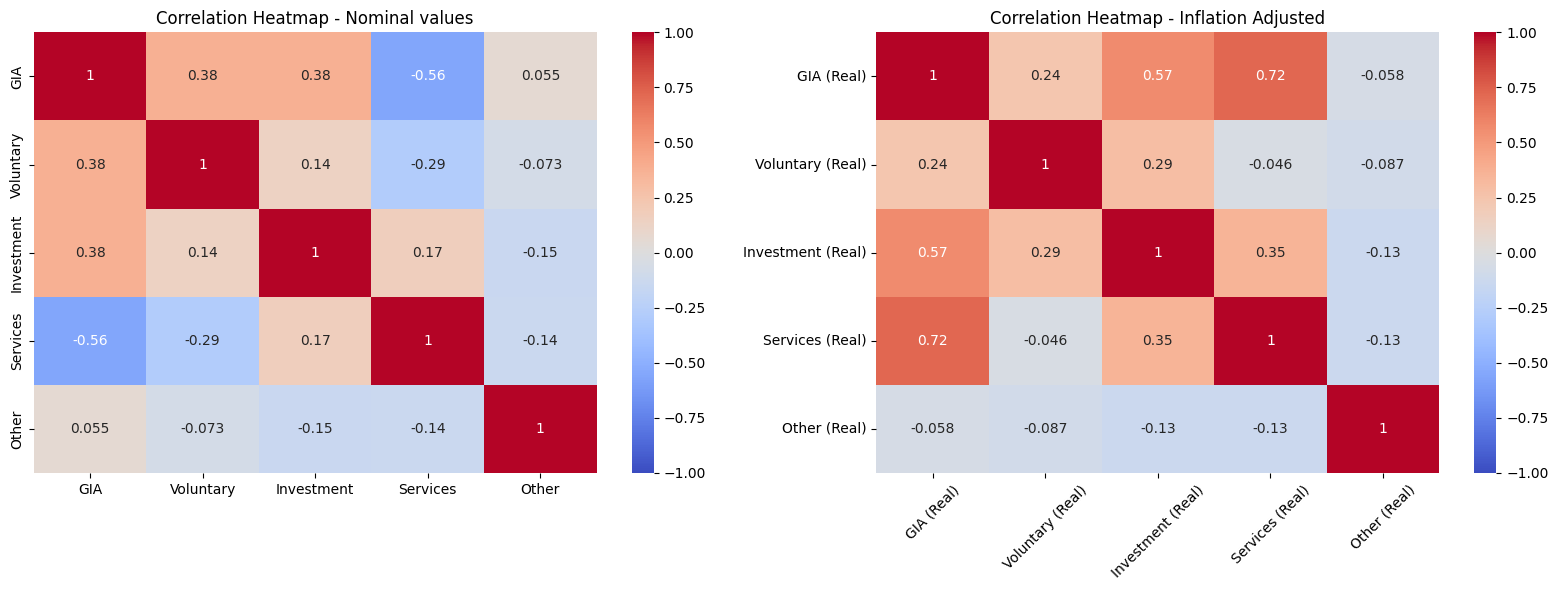

In [18]:
# Create mappings for better labels
label_map = {
    "gia_gbp_millions": "GIA",
    "voluntary_gbp_millions": "Voluntary",
    "investment_gbp_millions": "Investment",
    "services_gbp_millions": "Services",
    "other_gbp_millions": "Other",
    "gia_y2000_gbp_millions": "GIA (Real)",
    "voluntary_y2000_gbp_millions": "Voluntary (Real)",
    "investment_y2000_gbp_millions": "Investment (Real)",
    "services_y2000_gbp_millions": "Services (Real)",
    "other_y2000_gbp_millions": "Other (Real)"
}

# Apply mapping for better readability
corr_nominal = df[sources_nominal].corr().rename(index=label_map, columns=label_map)
corr_real = df[sources_real].corr().rename(index=label_map, columns=label_map)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmaps with consistent color scale
vmin, vmax = -1, 1
sns.heatmap(corr_nominal, annot=True, cmap='coolwarm', center=0, ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title('Correlation Heatmap - Nominal values')

sns.heatmap(corr_real, annot=True, cmap='coolwarm', center=0, ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title('Correlation Heatmap - Inflation Adjusted')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


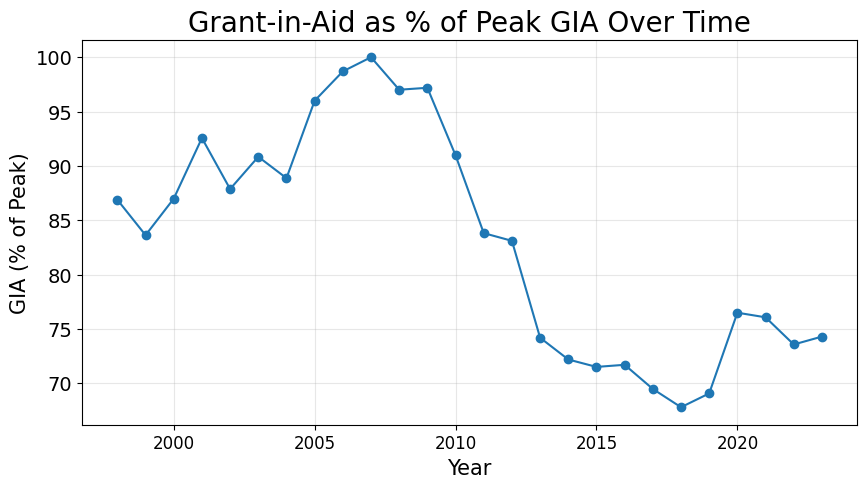

In [98]:
plt.figure(figsize=(10,5))
plt.plot(df['year'], df['gia_as_percent_of_peak_gia'] * 100, marker='o')
plt.title('Grant-in-Aid as % of Peak GIA Over Time', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('GIA (% of Peak)', size=15)
plt.xticks(size=12)
plt.yticks(size=14)
plt.grid(alpha=0.3)
plt.show()

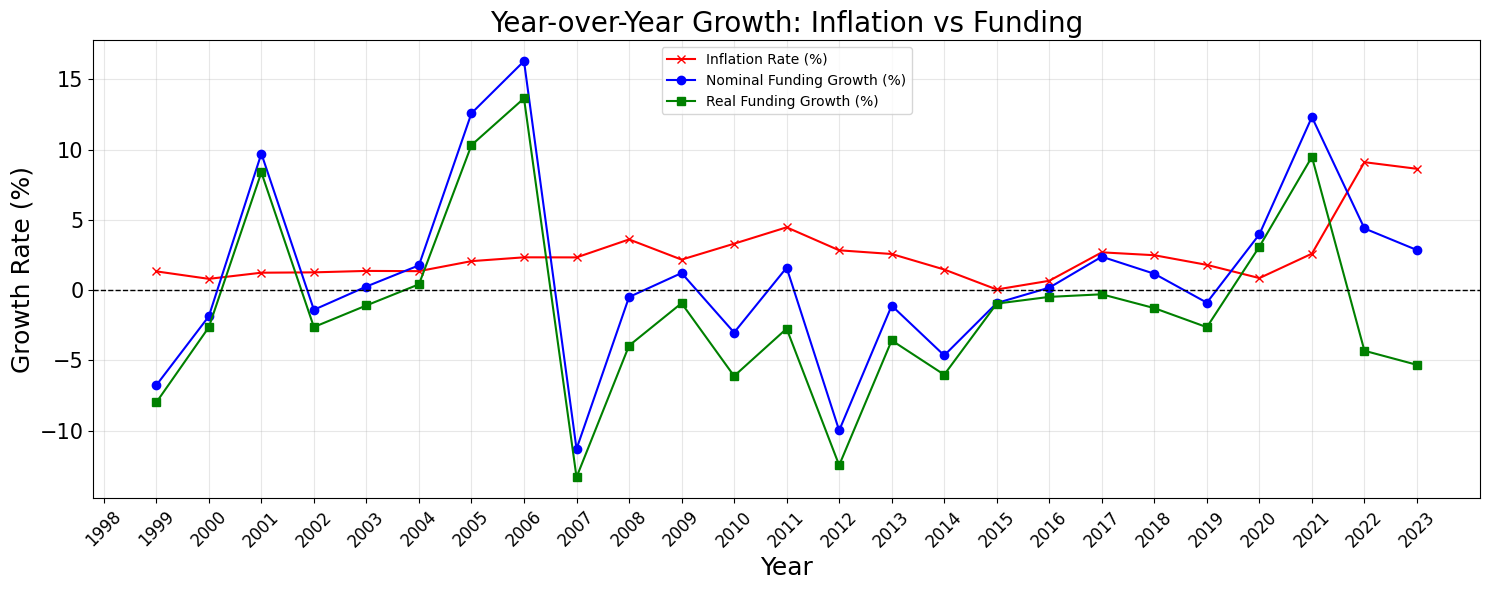

In [48]:
df = df.sort_values('year').reset_index(drop=True)

# Calculate YoY changes
df['inflation_rate'] = df['inflation_adjustment'].pct_change() * 100
df['nominal_growth'] = df['nominal_gbp_millions'].pct_change() * 100
df['real_growth'] = df['total_y2000_gbp_millions'].pct_change() * 100

# Plot
plt.figure(figsize=(15,6))
plt.plot(df['year'], df['inflation_rate'], color='red', marker='x', label='Inflation Rate (%)')
plt.plot(df['year'], df['nominal_growth'], color='blue', marker='o', label='Nominal Funding Growth (%)')
plt.plot(df['year'], df['real_growth'], color='green', marker='s', label='Real Funding Growth (%)')

# Add zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Year-over-Year Growth: Inflation vs Funding', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Growth Rate (%)', size=18)
years = sorted(df['year'])
plt.xticks(ticks=years, size=12, rotation=45)
plt.yticks(size=15)
plt.legend(loc='upper center')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


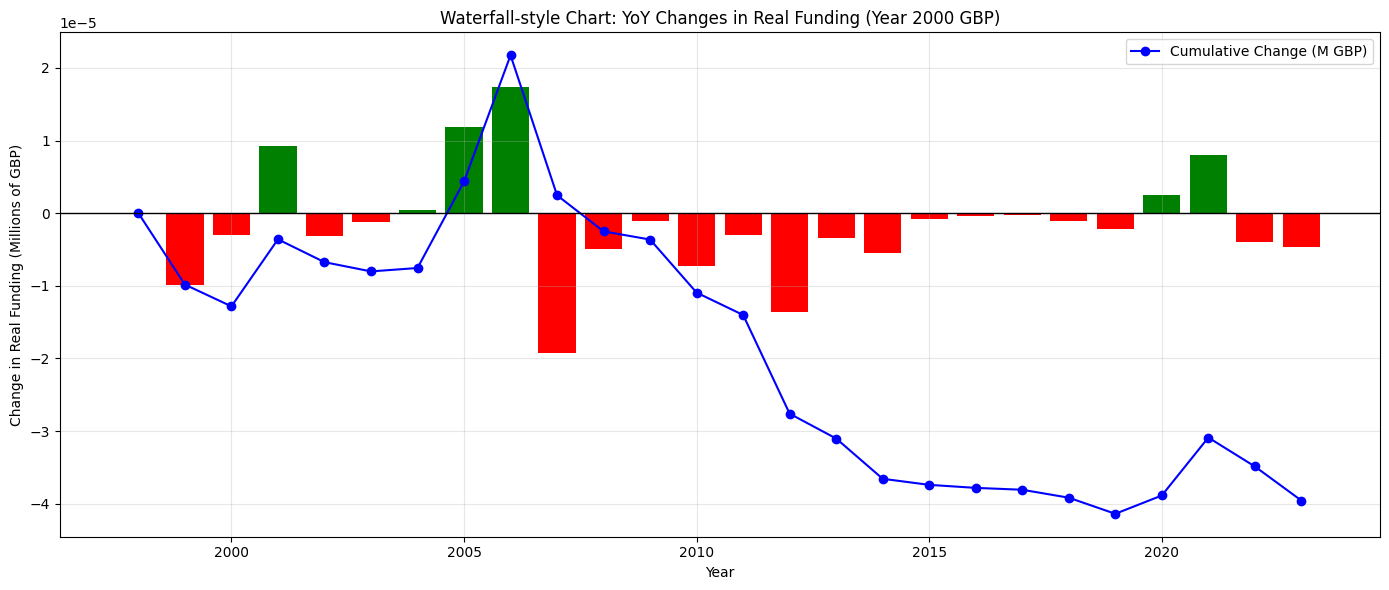

In [37]:
df = df.sort_values('year').reset_index(drop=True)
changes = df['total_y2000_gbp_millions'].diff().fillna(0) / 1e6  # Convert to millions
cumulative = changes.cumsum()

# Bar colors: green for positive, red for negative
colors = ['green' if x >= 0 else 'red' for x in changes]

# X-axis labels
years = df['year']

# Plot
plt.figure(figsize=(14,6))
plt.bar(years, changes, color=colors)
plt.plot(years, cumulative, color='blue', marker='o', label='Cumulative Change (M GBP)')

# Add annotations
for i, val in enumerate(changes):
    if abs(val) > 0.01:  # avoid clutter
        plt.text(years[i], val + (50 if val > 0 else -50), f'{val:.1f}', ha='center')

plt.axhline(0, color='black', linewidth=1)
plt.title('Waterfall-style Chart: YoY Changes in Real Funding (Year 2000 GBP)')
plt.xlabel('Year')
plt.ylabel('Change in Real Funding (Millions of GBP)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


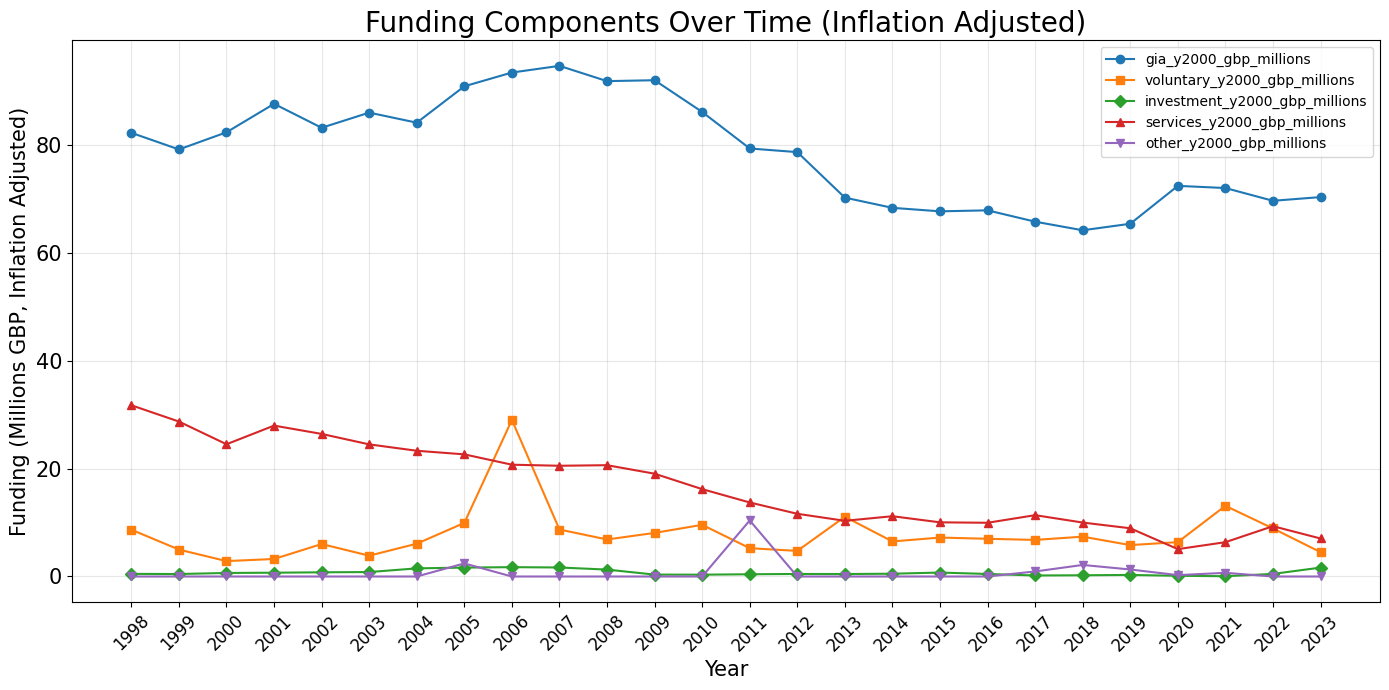

In [46]:
# Components (inflation-adjusted)
components = [
    'gia_y2000_gbp_millions', 
    'voluntary_y2000_gbp_millions', 
    'investment_y2000_gbp_millions', 
    'services_y2000_gbp_millions', 
    'other_y2000_gbp_millions'
]

markers = ['o', 's', 'D', '^', 'v'] 

df = df.sort_values('year').reset_index(drop=True)
years = df['year']

plt.figure(figsize=(14,7))

for comp, mark in zip(components, markers):
    plt.plot(years, df[comp], marker=mark, label=comp)

plt.xlabel('Year', size=15)
plt.ylabel('Funding (Millions GBP, Inflation Adjusted)', size=15)
plt.title('Funding Components Over Time (Inflation Adjusted)', size=20)
years = sorted(df['year'])
plt.xticks(ticks=years, size=12, rotation=45)
plt.yticks(size=15)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()